**CP2 - Inteligência Artificial e Computacional**

Classificadores

---

Nomes:

[Colocar nome e RM dos integrantes do grupo]

*Orientações:*

*   Esse arquivo contem o modelo esperado de respostas para a CP2. Podem ser acrescentadas algumas outras informações ou trechos com códigos, entretanto não esqueçam de responder todos os pontos que foram levantados a seguir
*   **CP2 em duplas**
*   Usar o arquivo 40922.csv para receber os seus dados e realizar esse CP
*   Prazo de entrega: 26/09 via TEAMS
*   Entregar esse arquivo com a sua resolução via TEAMS

## Exercícico de Classificação de Dados

In [ ]:
# Tratamento dos dados
import numpy as np
import pandas as pd
from collections import Counter

# Modelos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#######################################################################
# IMPORTAR SEUS MODELOS DE MACHILE LEARNING E OUTRAS BIBS NECESSÁRIAS
#######################################################################

# Métricas de avaliação
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report, plot_roc_curve

# importando os datasets padroes do sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler



# Plot dos gráficos
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns


# + Modelos de Machine Learning
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree

1. Carregar os dataset do exercício:

In [ ]:
# Carregue aqui o conjunto de dados
dados = pd.read_csv("40922.csv", sep = ',') 

## Questoes 2.*

In [ ]:
dados.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,activity
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-29.2960,0
1,0.6722,-11.2330,-0.2344,-0.1757,0.0208,0.1269,0
2,0.4399,-14.8170,0.0722,-0.9105,0.1063,-24.3670,0
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-29.3360,0
4,0.4814,-0.9312,0.0359,0.0527,0.4379,24.9220,0


- Item A) Verificação os tipos de dados envolvidos;

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   acceleration_x  88588 non-null  float64
 1   acceleration_y  88588 non-null  float64
 2   acceleration_z  88588 non-null  float64
 3   gyro_x          88588 non-null  float64
 4   gyro_y          88588 non-null  float64
 5   gyro_z          88588 non-null  float64
 6   activity        88588 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 4.7 MB


- b) Verificar as médias, desvios padrões e distribuição dos dados

In [ ]:
dados.describe()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,activity
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,-0.735403,-3.425864,-1.585894,0.005690,0.285645,0.281254,0.500801
std,9.419857,5.633842,4.631486,11.779596,11.209552,18.821379,0.500002
min,-53.505000,-32.990000,-37.538000,-44.306000,-74.647000,-94.800000,0.000000
25%,-0.381800,-10.335000,-0.376000,-0.920700,-0.644825,-13.451250,0.000000
50%,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900,1.000000
75%,0.355500,-0.241775,-0.085900,0.888800,0.733700,13.982000,1.000000
max,56.033000,26.680000,16.403000,48.742000,84.980000,112.662000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8c355ead0>,
      dtype=object)

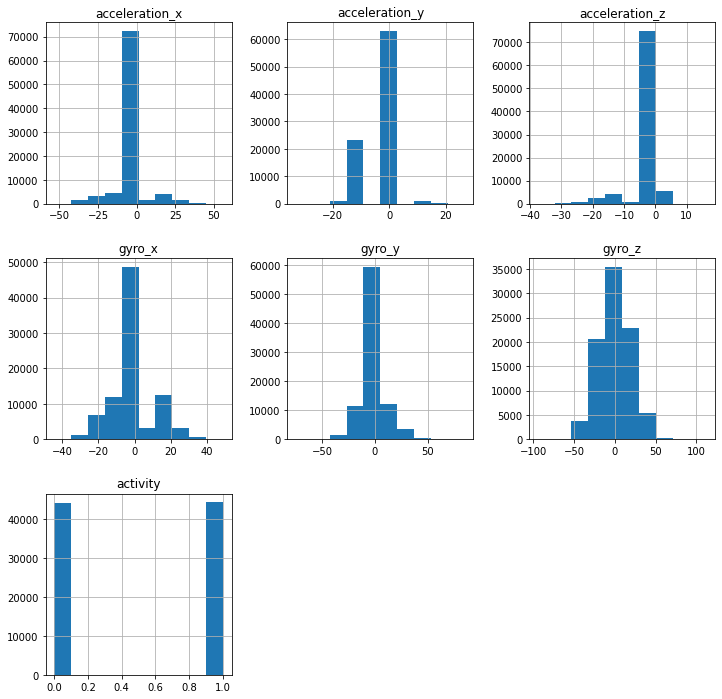

In [ ]:
# Verificar distribuição inicial dos dados
dados.hist(figsize=(12,12))

In [ ]:
#verificando de forma individual media,mediana,valores max & min e desvio padrao para a coluna gyro_z
media_gyro_z = dados["gyro_z"].mean()
mediana_gyro_z = dados["gyro_z"].median()
min_gyro_z = dados["gyro_z"].min()
max_gyro_z = dados["gyro_z"].max()
desvpad_gyro_z = dados["gyro_z"].std()

In [ ]:
#testando a normalizacao de maneira individual para os dados da coluna gyro_z
def normalizacao(valor):
  return (valor - min_gyro_z)/(max_gyro_z-min_gyro_z)

- c) Checar por valores nulos no conjunto de dados (e se existir, tratá-los)

In [ ]:
dados.isnull().sum()

acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
activity          0
dtype: int64

- d) Verificar se existem atributos categóricos para serem tratados. (e se existir, tratá-los)
- - não foram encontrados valores categóricos

- e) Verificar via heatmap com a correlação de Pearson a relação entre os atributos

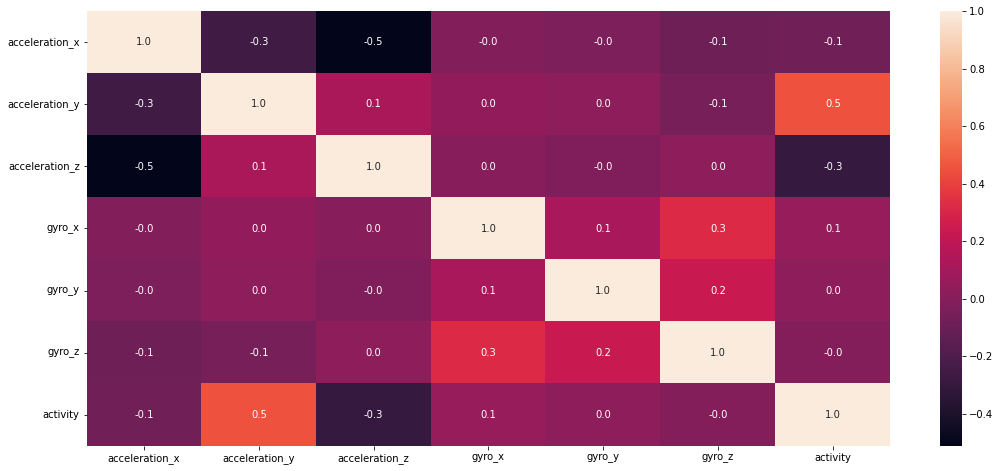

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(dados.corr(method = 'pearson'), annot=True, fmt=".1f")

### Tratando Outliers

In [ ]:
def ajuste_boxplot(data, colunas):
  
  # Criando uma cópia do DataFrame original
  # Dataframes atribuidos com o operador '=' compartilham os index e as informações armazenadas. Para evitar isso usamos o copy()
  dados = data.copy()
  
  for n in range(0, len(colunas)): # Percorrendo a lista das colunas
    # Recebendo os dois quartis de interesse
    quartis = np.quantile(dados[colunas[n]], [0.25,0.75])

    # Calculando os limites superiores e inferiores:
    limite_inferior = quartis[0] -1.5*(quartis[1]-quartis[0])
    limite_superior = quartis[1] +1.5*(quartis[1]-quartis[0])

    # Calculando o valor da mediana
    mediana = dados[colunas[n]].median()

    # Criando a mascara para filtrar os dados e imprimindo os valores que serão ajustados
    mask = (dados[colunas[n]] < limite_inferior) | (dados[colunas[n]] > limite_superior)
    print(f"A coluna {colunas[n]} possui {mask.sum()} outliers para serem tratados")
    
    # Substitui os valores pela mediana
    dados.loc[mask,colunas[n]] = mediana
    
    # Exibindo no console a quantidade de valores que foram tratados
    mask = (dados[colunas[n]] < limite_inferior) | (dados[colunas[n]] > limite_superior)
    print(f"A coluna {colunas[n]} possui {mask.sum()} outliers após serem tratados")

  return dados

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'acceleration_x')

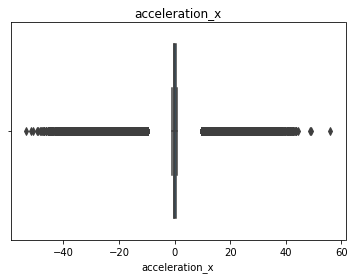

In [ ]:
sns.boxplot(dados["acceleration_x"]).set_title('acceleration_x')

In [ ]:
def calc_limites(data_set_coluna):
    quartis = np.quantile(data_set_coluna, [0.25,0.75])
    limite_inferior = quartis[0] -1.5*(quartis[1]-quartis[0])
    limite_superior = quartis[1] +1.5*(quartis[1]-quartis[0])
    return(limite_inferior,limite_superior)

def ajusta_outliers(data_set,coluna):
    limites = calc_limites(data_set[coluna])

    mascara_x = (data_set[coluna] <  limites[0])  | ( data_set[coluna] > limites[1])

    data_set.loc[mascara_x,coluna] = data_set[coluna].median()

In [ ]:
# bkp dos dados originais
dados_v1 = dados.copy()

In [ ]:
minhas_colunas = []
for i in dados_v1.columns:
    minhas_colunas.append(i)
    
ajuste_boxplot(dados_v1,minhas_colunas)

A coluna acceleration_x possui 16249 outliers para serem tratados
A coluna acceleration_x possui 0 outliers após serem tratados
A coluna acceleration_y possui 179 outliers para serem tratados
A coluna acceleration_y possui 0 outliers após serem tratados
A coluna acceleration_z possui 12637 outliers para serem tratados
A coluna acceleration_z possui 0 outliers após serem tratados
A coluna gyro_x possui 39837 outliers para serem tratados
A coluna gyro_x possui 0 outliers após serem tratados
A coluna gyro_y possui 30479 outliers para serem tratados
A coluna gyro_y possui 0 outliers após serem tratados
A coluna gyro_z possui 134 outliers para serem tratados
A coluna gyro_z possui 0 outliers após serem tratados
A coluna activity possui 0 outliers para serem tratados
A coluna activity possui 0 outliers após serem tratados


,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,activity
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-29.2960,0
1,0.6722,-11.2330,-0.2344,-0.1757,0.0208,0.1269,0
2,0.4399,-14.8170,0.0722,-0.9105,0.1063,-24.3670,0
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-29.3360,0
4,0.4814,-0.9312,0.0359,0.0527,0.4379,24.9220,0
...,...,...,...,...,...,...,...
88583,0.3084,-0.8376,-0.1327,0.4823,0.0393,0.6048,0
88584,0.4977,-10.0270,-0.4397,0.1022,0.0393,-0.0761,0
88585,0.4587,-11.7800,-0.2827,0.0187,-0.2792,-12.6160,0
88586,0.2590,-0.8582,-0.0759,0.0187,0.4560,-17.7550,0


### boxplot antes de ajustar outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'acceleration_x')

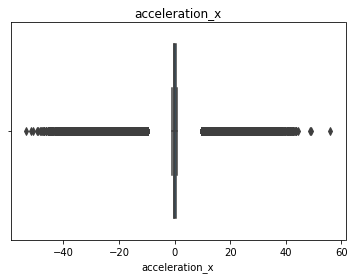

In [ ]:
sns.boxplot(dados_v1["acceleration_x"]).set_title('acceleration_x')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'acceleration_y')

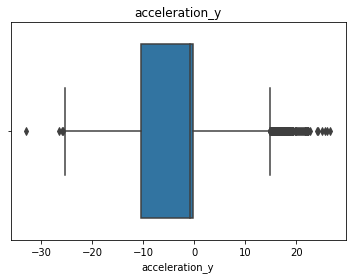

In [ ]:
sns.boxplot(dados_v1["acceleration_y"]).set_title('acceleration_y')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'acceleration_z')

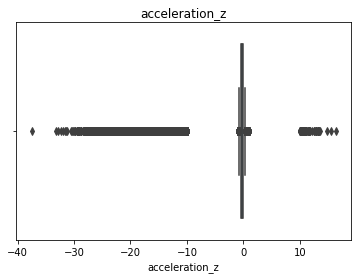

In [ ]:
sns.boxplot(dados_v1["acceleration_z"]).set_title('acceleration_z')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'gyro_x')

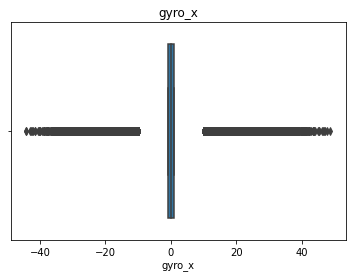

In [ ]:
sns.boxplot(dados_v1["gyro_x"]).set_title('gyro_x')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'gyro_y')

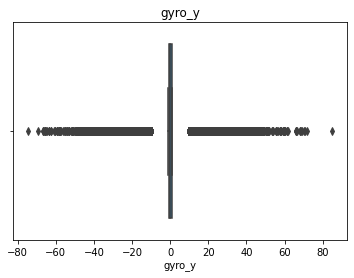

In [ ]:
sns.boxplot(dados_v1["gyro_y"]).set_title('gyro_y')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'gyro_z')

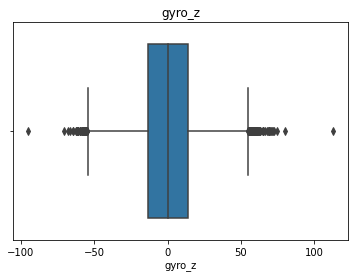

In [ ]:
sns.boxplot(dados_v1["gyro_z"]).set_title('gyro_z')

### depois de ajustar os outliers

In [ ]:
dados_ajustados_outliers = dados_v1.copy()
ajusta_outliers(dados_ajustados_outliers,"acceleration_x")
ajusta_outliers(dados_ajustados_outliers,"acceleration_y")
ajusta_outliers(dados_ajustados_outliers,"acceleration_z")

ajusta_outliers(dados_ajustados_outliers,"gyro_x")
ajusta_outliers(dados_ajustados_outliers,"gyro_y")
ajusta_outliers(dados_ajustados_outliers,"gyro_z")



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'acceleration_x')

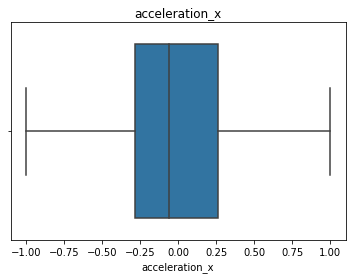

In [ ]:
sns.boxplot(dados_ajustados_outliers["acceleration_x"]).set_title('acceleration_x')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'acceleration_y')

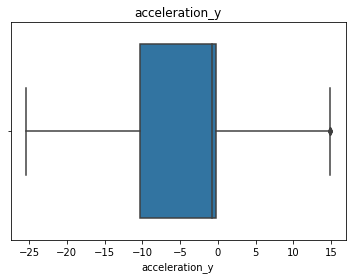

In [ ]:
sns.boxplot(dados_ajustados_outliers["acceleration_y"]).set_title('acceleration_y')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'acceleration_z')

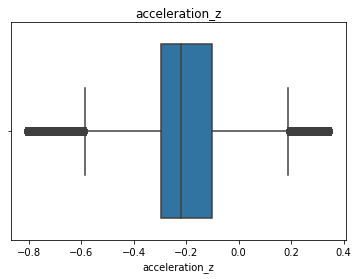

In [ ]:
sns.boxplot(dados_ajustados_outliers["acceleration_z"]).set_title('acceleration_z')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'gyro_x')

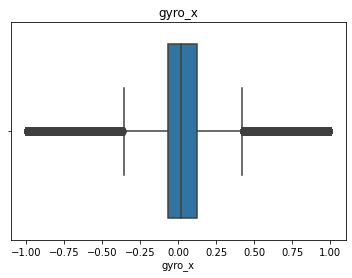

In [ ]:
sns.boxplot(dados_ajustados_outliers["gyro_x"]).set_title('gyro_x')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'gyro_y')

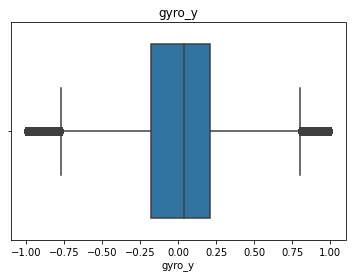

In [ ]:
sns.boxplot(dados_ajustados_outliers["gyro_y"]).set_title('gyro_y')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'gyro_z')

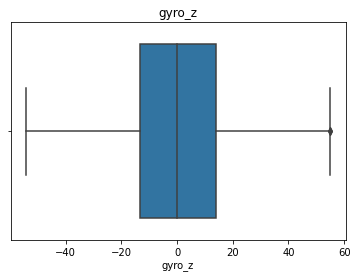

In [ ]:
sns.boxplot(dados_ajustados_outliers["gyro_z"]).set_title('gyro_z')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8c2d98c50>,
      dtype=object)

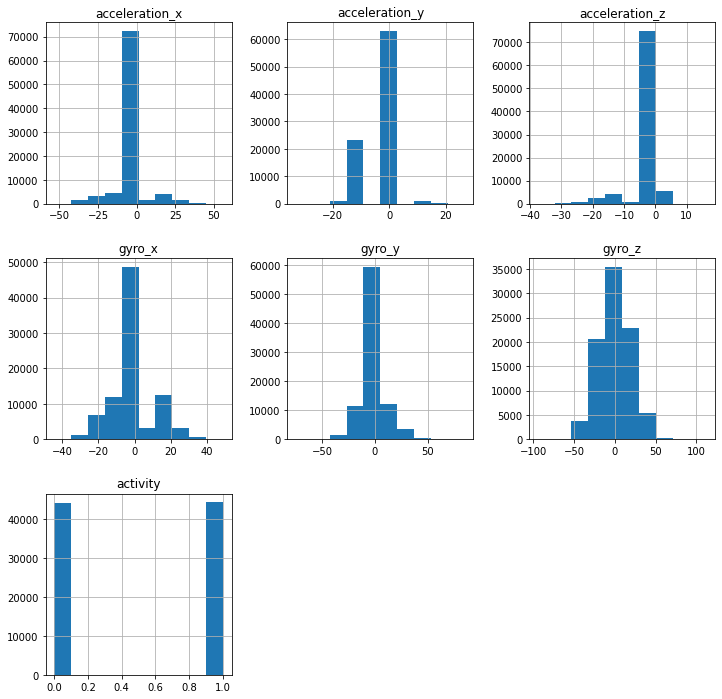

In [ ]:
# distribuição sem ajustar outliers
dados_v1.hist(figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8c2951450>,
      dtype=object)

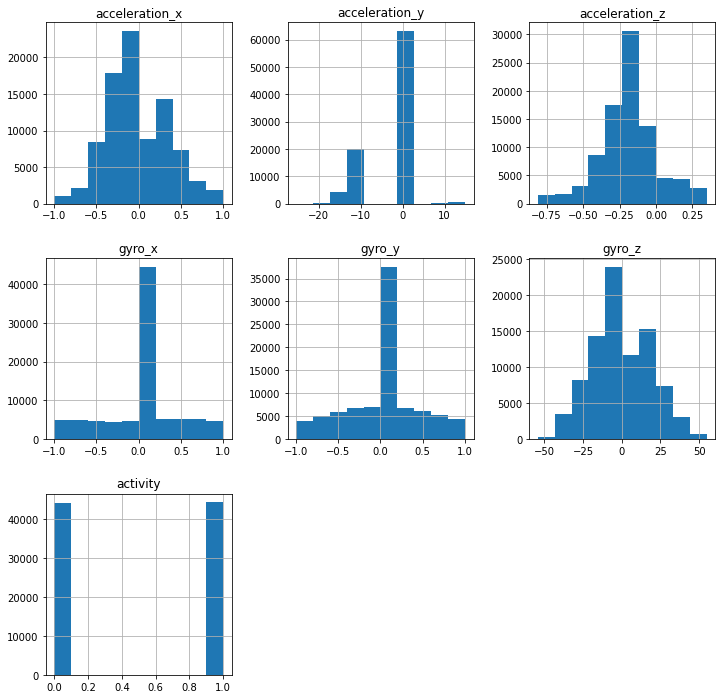

In [ ]:
# Verificar distribuição dos dados apos ajustar outliers
dados_ajustados_outliers.hist(figsize=(12,12))

In [ ]:
#analisando a correlacão dos dados comparando os dados com tratamento de outliers & normalizados -> (dados_v3) & os dados sem esses tratamentos -> (dados_v1)
print("Antes: \n",dados_v1.corr(method = 'pearson')['activity'].sort_values(ascending=False))
print("\n \n")
print("Depois: \n",dados_ajustados_outliers.corr(method = 'pearson')['activity'].sort_values(ascending=False))

Antes: 
 activity          1.000000
acceleration_y    0.450924
gyro_x            0.056875
gyro_y            0.029254
gyro_z           -0.005396
acceleration_x   -0.072085
acceleration_z   -0.294056
Name: activity, dtype: float64

 

Depois: 
 activity          1.000000
acceleration_y    0.451128
acceleration_x    0.122309
acceleration_z    0.118954
gyro_z           -0.007177
gyro_x           -0.039001
gyro_y           -0.043987
Name: activity, dtype: float64


### iniciando a normalizacao dos dados "dados_ajustados_outliers"

In [ ]:
from sklearn import preprocessing

#criando bkp dos dados ajustados
dados_v2 = dados_ajustados_outliers.copy()

#removendo a coluna de atividade para utilizar a normalizacao de dados
dados_v2.drop(["activity"],axis=1,inplace=True)

scaler = preprocessing.MinMaxScaler()

names = dados_v2.columns

d = scaler.fit_transform(dados_v2)

dados_normalizados_sem_outliers = pd.DataFrame(d, columns=names)


In [ ]:
#visualizando os dados ajustados normalizacao e sem outliers
dados_normalizados_sem_outliers.head()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.632458,0.611140,0.692553,0.470497,0.516227,0.228229
1,0.836109,0.351718,0.497069,0.412141,0.510377,0.497600
2,0.719930,0.262758,0.761334,0.044704,0.553133,0.273355
3,0.651513,0.610368,0.775642,0.559956,0.294994,0.227863
4,0.740685,0.607422,0.730047,0.526353,0.718958,0.724604


In [ ]:
#criando uma copia dos dados
dados_v3 = dados_normalizados_sem_outliers.copy()

#add a coluna de "activity"  para o conjunto de dados ajustados (outliers + normalizacao)
dados_v3 = dados_v3.assign(activity = dados_v1["activity"])

#verificando os dados
dados_v3.describe()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,activity
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.493760,0.544636,0.530072,0.506200,0.511537,0.498680,0.500801
std,0.182639,0.137861,0.170057,0.215286,0.213804,0.170936,0.500002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.358840,0.374026,0.444923,0.466222,0.409661,0.373531,0.000000
50%,0.470168,0.611693,0.508619,0.509351,0.519628,0.496502,1.000000
75%,0.630008,0.624283,0.611877,0.563256,0.606003,0.623972,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### teorias a serem analisadas abaixo:

In [ ]:
#sns.pairplot(data=dados_v3, hue="activity")

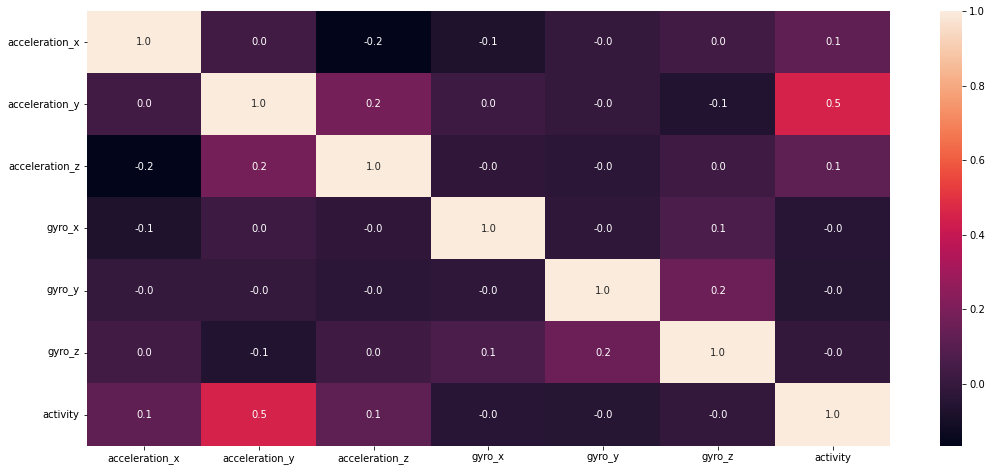

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(dados_v3.corr(method = 'pearson'), annot=True, fmt=".1f")

In [ ]:
#analisando a correlacão dos dados comparando os dados com tratamento de outliers & normalizados -> (dados_v3) & os dados sem esses tratamentos -> (dados_v1)

print("Bruto: \n",dados_v1.corr(method = 'pearson')['activity'].sort_values(ascending=False))

print("\n \n")
print("dados_ajustados_outliers: \n",dados_ajustados_outliers.corr(method = 'pearson')['activity'].sort_values(ascending=False))

print("\n \n")
print("tratamento de outliers & normalizados: \n",dados_v3.corr(method = 'pearson')['activity'].sort_values(ascending=False))

Bruto: 
 activity          1.000000
acceleration_y    0.450924
gyro_x            0.056875
gyro_y            0.029254
gyro_z           -0.005396
acceleration_x   -0.072085
acceleration_z   -0.294056
Name: activity, dtype: float64

 

dados_ajustados_outliers: 
 activity          1.000000
acceleration_y    0.451128
acceleration_x    0.122309
acceleration_z    0.118954
gyro_z           -0.007177
gyro_x           -0.039001
gyro_y           -0.043987
Name: activity, dtype: float64

 

tratamento de outliers & normalizados: 
 activity          1.000000
acceleration_y    0.451128
acceleration_x    0.122309
acceleration_z    0.118954
gyro_z           -0.007177
gyro_x           -0.039001
gyro_y           -0.043987
Name: activity, dtype: float64


### Preparando os dados para ML

In [ ]:
#criando bkp dos dados ajustados para comecar a padronizacao e preparar para ML
dados_v4 = dados_ajustados_outliers.copy()

In [ ]:
dados_v4["activity"].replace({0:"Andando",1:"Correndo"},inplace=True)

In [ ]:
X = dados_v4.drop(columns=["activity"])
y = dados_v4["activity"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Treinando os Modelos de I.A

In [ ]:
labels_classificadores = ["Correndo","Andando"]

In [ ]:
# Arvore de decisao
clf_AD = DecisionTreeClassifier()
clf_AD.fit(X_train,y_train)
y_pred_AD = clf_AD.predict(X_test)

cm_AD = confusion_matrix(y_test,y_pred_AD, labels = labels_classificadores)

In [ ]:
# Random Forest
clf_RF = RandomForestClassifier()
clf_RF.fit(X_train,y_train)
y_pred_RF = clf_RF.predict(X_test)

cm_RF = confusion_matrix(y_test,y_pred_RF, labels = labels_classificadores)

In [ ]:
# SVM/SVC suport vector machine / classifier
clf_SVC = SVC()
clf_SVC.fit(X_train,y_train)
y_pred_SVC = clf_SVC.predict(X_test)

cm_SVC = confusion_matrix(y_test,y_pred_SVC, labels = labels_classificadores)

In [ ]:
# Gaussiano
clf_G = GaussianNB()
clf_G.fit(X_train,y_train)
y_pred_G = clf_G.predict(X_test)

cm_G = confusion_matrix(y_test,y_pred_G, labels = labels_classificadores)

In [ ]:
# Discriminante Linear
clf_LDA = LinearDiscriminantAnalysis()
clf_LDA.fit(X_train,y_train)
y_pred_LDA = clf_LDA.predict(X_test)

cm_LDA = confusion_matrix(y_test,y_pred_LDA, labels = labels_classificadores)

In [ ]:
# Discriminante Quadratico
clf_QDA = QuadraticDiscriminantAnalysis()
clf_QDA.fit(X_train,y_train)
y_pred_QDA = clf_QDA.predict(X_test)

cm_QDA = confusion_matrix(y_test,y_pred_QDA, labels = labels_classificadores)

In [ ]:
# Gradient Boosting Classifier
clf_GBC = GradientBoostingClassifier()
clf_GBC.fit(X_train,y_train)
y_pred_GBC = clf_GBC.predict(X_test)

cm_GBC = confusion_matrix(y_test,y_pred_GBC, labels = labels_classificadores)

## Metricas de Desempenho

In [ ]:
matrizes_confusao = {
    "Arvore de Decisao" : cm_AD, 
    "Random Forest":cm_RF, 
    "SVC":cm_SVC,
    "Gaussiano":cm_G, 
    "Discriminante Linear":cm_LDA,
    "Discriminante Quadratico":cm_QDA,
    "Gradiente":cm_GBC
}

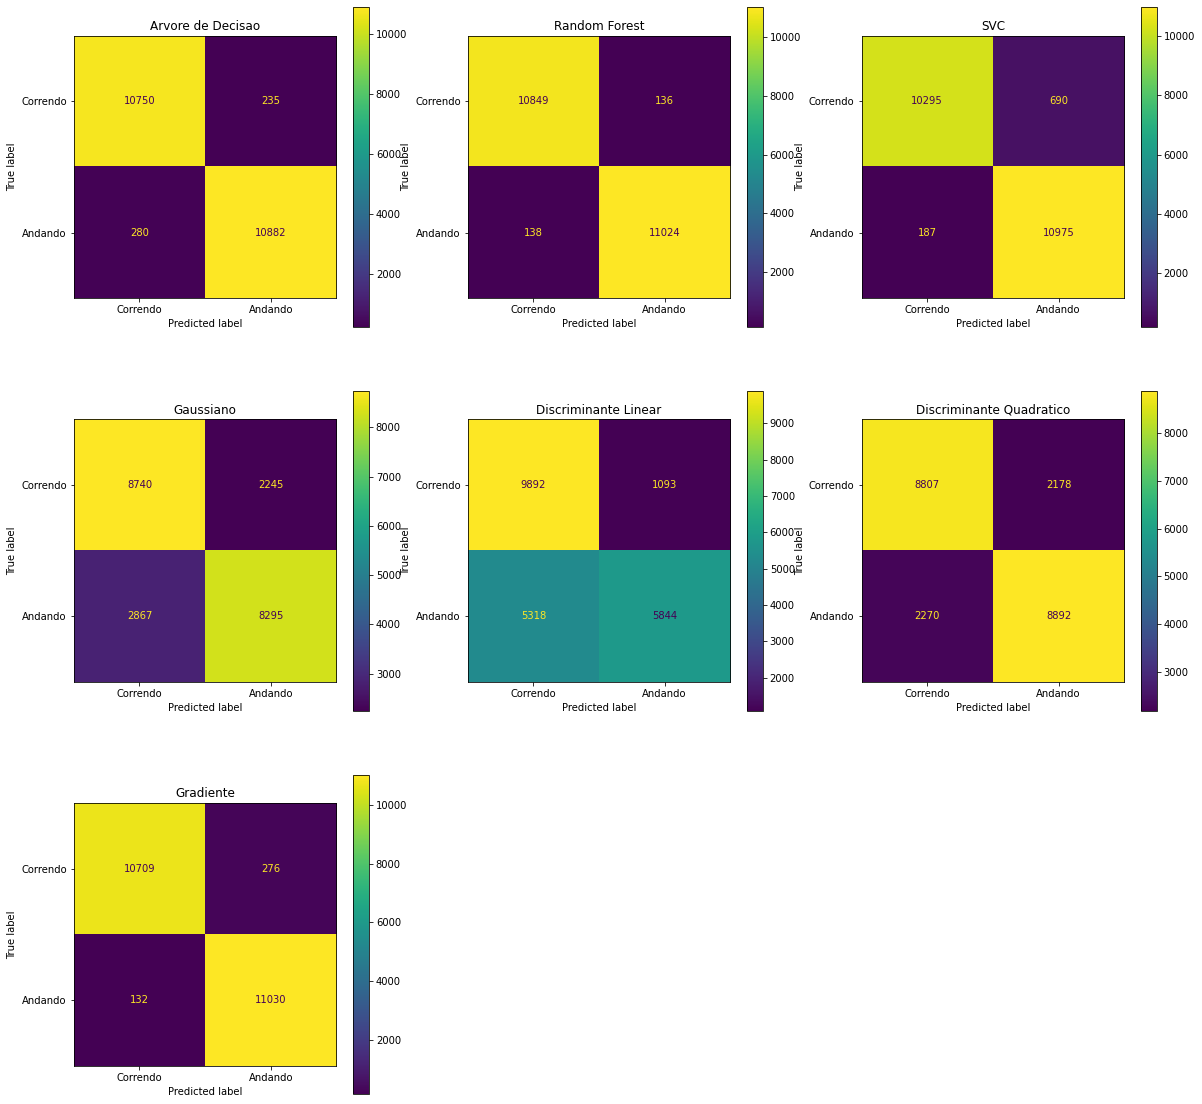

In [ ]:
figure = plt.figure(figsize=(20,20))
for i, (nome_clf,cm) in enumerate(matrizes_confusao.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=labels_classificadores)
    
    ax = plt.subplot(3,3,i+1)
    disp.plot(ax=ax,values_format="d")
    ax.set_title(nome_clf)
    

In [ ]:
previsoes_modelo = {
    "Arvore de Decisao" : y_pred_AD, 
    "Random Forest":y_pred_RF, 
    "SVC":y_pred_SVC,
    "Gaussiano":y_pred_G, 
    "Discriminante Linear":y_pred_LDA,
    "Discriminante Quadratico":y_pred_QDA,
    "Gradiente":y_pred_GBC
}

In [ ]:
for nome_clf, y_pred in previsoes_modelo.items():
    print(nome_clf)
    print(classification_report(y_test,y_pred))

Arvore de Decisao
              precision    recall  f1-score   support

     Andando       0.98      0.97      0.98     11162
    Correndo       0.97      0.98      0.98     10985

    accuracy                           0.98     22147
   macro avg       0.98      0.98      0.98     22147
weighted avg       0.98      0.98      0.98     22147

Random Forest
              precision    recall  f1-score   support

     Andando       0.99      0.99      0.99     11162
    Correndo       0.99      0.99      0.99     10985

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147

SVC
              precision    recall  f1-score   support

     Andando       0.94      0.98      0.96     11162
    Correndo       0.98      0.94      0.96     10985

    accuracy                           0.96     22147
   macro avg       0.96      0.96      0.96     22147
weighted avg       0.96      0.96     

Esse conjunto de dados possui os seguintes atributos:

Dados dos sensores:
*   acceleration_x
*   acceleration_y
*   acceleration_z
*   gyro_x
*   gyro_y
*   gyro_z

Atividade física: 
*   "0": andando e "1": correndo

2. Fazer a análise exploratória dos dados 

Responda aos seguintes itens:

a) Verificação os tipos de dados envolvidos;

b) Verificar as médias, desvios padrões e distribuição dos dados

c) Checar por valores nulos no conjunto de dados (e se existir, tratá-los)

d) Verificar se existem atributos categóricos para serem tratados. (e se existir, tratá-los)

e) Verificar via heatmap com a correlação de Pearson a relação entre os atributos

3a. Dividir os dados em conjunto de treinamento (75%) e teste (25%). Escalar os dados se necessário e JUSTIFICAR porque os dados foram escalados ou não.

3b. Treinar ao menos 3 modelos distintos de Aprendizado de Máquina. Escolha três modelos entre aqueles vistos em aula para fazer o treinamento.

4. Levantar as metricas de desempenho 

[Matriz de confusão, Precisão, Revocação, Acurácia e F1-Score]

5. Conclusão

a) Qual o melhor modelo, entre os modelos treinado, para esse conjunto de dados?

[SUA RESPOSTA AQUI]

b) Caso necessitarmos o modelo com a melhor revocação considerando a classe '0' como a classe positiva. Qual seria o melhor modelo?

[SUA RESPOSTA AQUI]